In [1]:
from autometrics.dataset.datasets import Primock57
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression.PLS import PLS
from autometrics.aggregator.regression import Ridge, ElasticNet, Lasso, RandomForest, GradientBoosting, Linear
from autometrics.aggregator.regression.BudgetRegression import BudgetRegression

In [2]:
dataset = Primock57(path='./autometrics/dataset/datasets/primock57/metric-scores.csv')

In [3]:
calculate_correlation(dataset)

{'time_sec': {'human_note | ROUGE-1-F1*': np.float64(-0.2210666653540734),
  'human_note | ROUGE-2-F1*': np.float64(-0.2438561070499559),
  'human_note | ROUGE-3-F1*': np.float64(-0.2304967336644645),
  'human_note | ROUGE-4-F1*': np.float64(-0.2147377902945769),
  'human_note | ROUGE-L-Pr*': np.float64(-0.21559914070728997),
  'human_note | ROUGE-L-Re*': np.float64(-0.2667973914168294),
  'human_note | ROUGE-L-F1*': np.float64(-0.24372441111590204),
  'human_note | CHRF*': np.float64(-0.22112983608173942),
  'human_note | METEOR*': np.float64(-0.27302879924172485),
  'human_note | BLEU*': np.float64(-0.23480766931196095),
  'human_note | Levenshtein dist.': np.float64(-0.3399838906893468),
  'human_note | WER': np.float64(-0.14613320973746502),
  'human_note | MER': np.float64(-0.2517157405070455),
  'human_note | WIL': np.float64(-0.2548656737983419),
  'human_note | ROUGE-WE*': np.float64(-0.2613073502029944),
  'human_note | SkipThoughts*': np.float64(-0.1960303692056642),
  'human

In [4]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.1, seed=42)

In [5]:
display_top_5_metrics_by_validation(dev, test, False)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,edited_note | Levenshtein dist. (-0.7918037570...,edited_note | WIL (-0.6588840227717595),edited_note | ROUGE-L-Re* (-0.613928828580811),edited_note | ROUGE-L-F1* (-0.6571340283095053),edited_note | BLEU* (-0.6550569554057697)
incorrect,edited_note | ROUGE-L-Pr* (-0.7769928679302135),max | ROUGE-L-Pr* (-0.7432622187550944),avg | WIL (-0.5855855925864584),max | WIL (-0.577098785499778),max | ROUGE-2-F1* (-0.572881867252673)
omissions,edited_note | Levenshtein dist. (-0.8147010748...,edited_note | BLEU* (-0.7869679083840544),edited_note | ROUGE-L-Re* (-0.7728796627697061),edited_note | METEOR* (-0.8102592938112041),edited_note | WMD (-0.7628137028823777)
inc_plus_omi,avg | WIL (-0.7337000553443466),edited_note | Levenshtein dist. (-0.8215430062...,edited_note | BertScore* (-0.8014333508586717),avg | ROUGE-4-F1* (-0.7406870690229901),max | ROUGE-2-F1* (-0.7260906607765181)


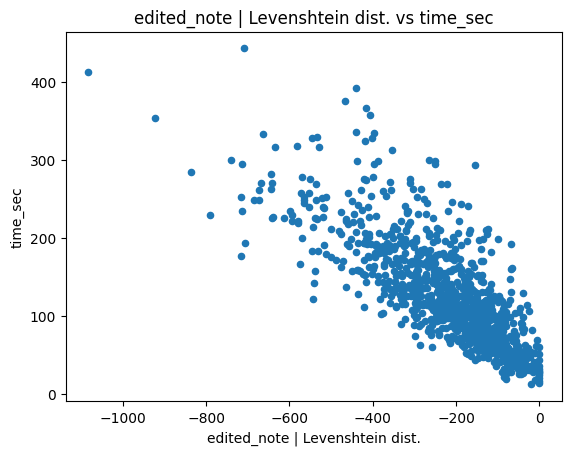

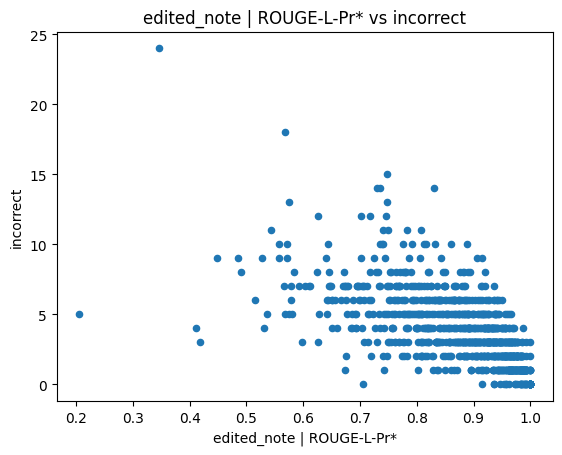

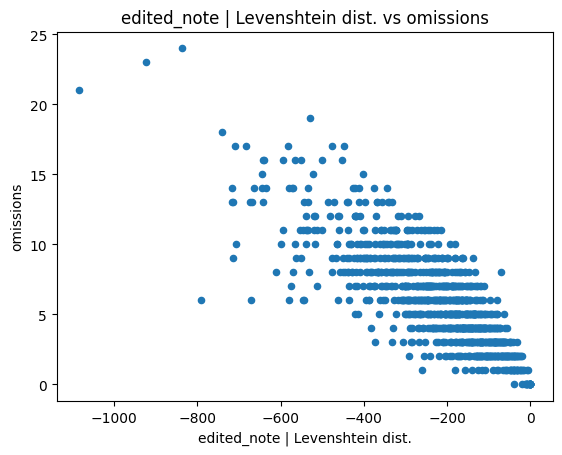

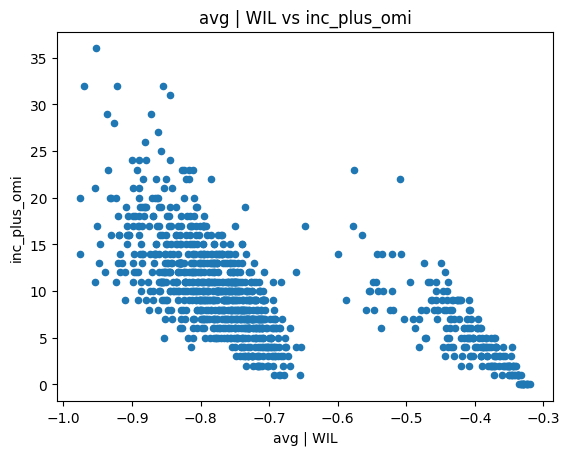

In [6]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, False, target_column)
    plot_metric_target_scatterplot(test, metric, target_column)

In [7]:
for model in [PLS, ElasticNet, Lasso, Ridge, RandomForest, GradientBoosting, Linear]:
    for target_column in dataset.target_columns:
        model_instance = model(dataset=train, name=model.__name__ + '_' + target_column)
        model_instance.learn(train, target_column)
        model_instance.predict(train, target_column)
        model_instance.predict(dev, target_column)
        model_instance.predict(test, target_column)

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+04, tolerance: 2.040e+02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.815e+04, tolerance: 2.040e+02
  model = cd_fast.enet_coordinate_descent(


In [8]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,Rg_time_sec (0.8223374670016869),Rg_omissions (0.74854385188165),Rg_inc_plus_omi (0.7758587318384566),edited_note | Levenshtein dist. (-0.7918037570...,ENet_time_sec (0.813253504912963)
incorrect,Rg_incorrect (0.7816079186424769),edited_note | ROUGE-L-Pr* (-0.7769928679302135),PLS_incorrect (0.7793636361349978),RandomForest_incorrect (0.780726807609988),max | ROUGE-L-Pr* (-0.7432622187550944)
omissions,Rg_omissions (0.842425821453117),ENet_omissions (0.8314605130105857),L_omissions (0.8312221642358786),RandomForest_omissions (0.8368432751617144),RandomForest_inc_plus_omi (0.7937505520298539)
inc_plus_omi,Rg_inc_plus_omi (0.8553512554357171),RandomForest_inc_plus_omi (0.8504668188027519),GB_inc_plus_omi (0.8483119744553024),PLS_inc_plus_omi (0.8098946230496049),Rg_omissions (0.7951469068371283)


In [9]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, test, True, target_column)
    plot_metric_target_scatterplot(test, metric, target_column)


TypeError: get_top_metric_by_validation() takes from 1 to 3 positional arguments but 4 were given

In [8]:
# Budget Runs
for model in [PLS, ElasticNet, Lasso, Ridge, RandomForest, GradientBoosting, Linear]:
    for budget in [2, 3, 5, 10, 15, 20, 25]:
        for target_column in dataset.target_columns:
            model_instance = model(dataset=train, name=model.__name__ + '_' + target_column)
            budget_model = BudgetRegression(model_instance, budget)
            budget_model.learn(train, target_column)
            budget_model.predict(train, target_column)
            budget_model.predict(dev, target_column)
            budget_model.predict(test, target_column)

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+04, tolerance: 2.040e+02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+04, tolerance: 2.040e+02
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

In [9]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
time_sec,Rg_time_sec (0.8223374670016869),RandomForest_time_sec_bgt_3Top 3 (0.7398647677...,GB_time_sec_bgt_3Top 3 (0.7682132859133527),Rg_omissions (0.74854385188165),Rg_inc_plus_omi (0.7758587318384566)
incorrect,Rg_incorrect (0.7816079186424769),Rg_incorrect_bgt_2Top 2 (0.7906062745106216),edited_note | ROUGE-L-Pr* (-0.7769928679302135),PLS_incorrect (0.7793636361349978),RandomForest_incorrect_bgt_15Top 15 (0.7799701...
omissions,Rg_omissions (0.842425821453117),GB_omissions_bgt_5Top 5 (0.8276918150075941),RandomForest_omissions_bgt_20Top 20 (0.8327214...,RandomForest_omissions_bgt_10Top 10 (0.8410943...,RandomForest_omissions_bgt_15Top 15 (0.8343911...
inc_plus_omi,Rg_inc_plus_omi (0.8553512554357171),RandomForest_ipo_bgt_20Top 20 (0.8531082568500...,RandomForest_inc_plus_omi (0.8504668188027519),RandomForest_ipo_bgt_25Top 25 (0.8521762781567...,GB_inc_plus_omi (0.8483119744553024)


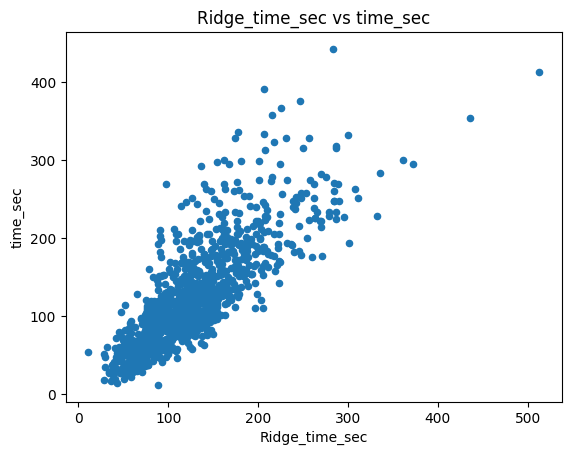

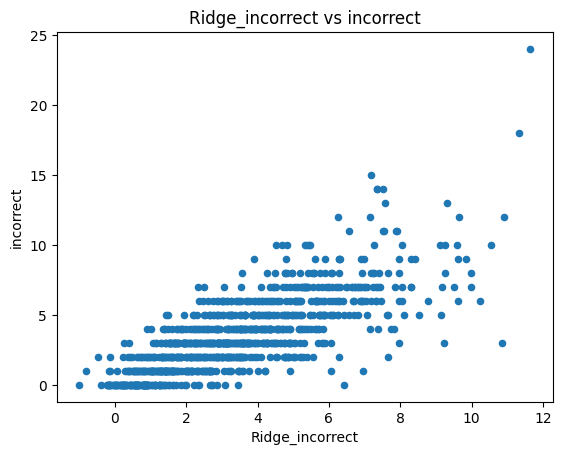

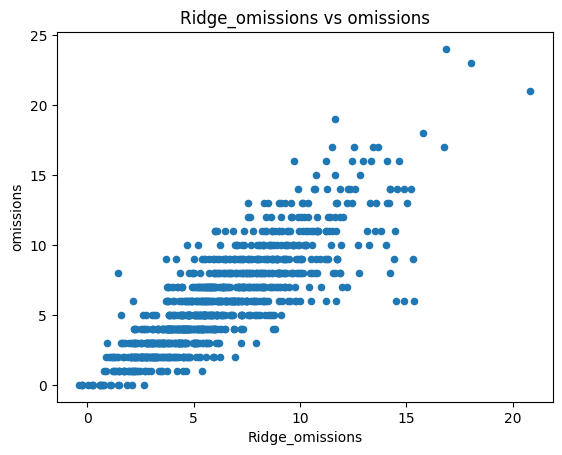

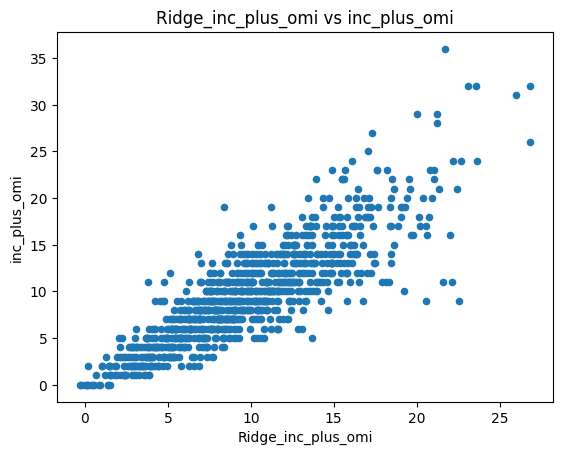

In [10]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, test, True, target_column)
    plot_metric_target_scatterplot(test, metric, target_column)